In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.sentiment import SentimentAnalyzer
from nltk.corpus import subjectivity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
from string import punctuation
from collections import Counter, OrderedDict

%matplotlib inline

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.isna().sum() 

review       0
sentiment    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


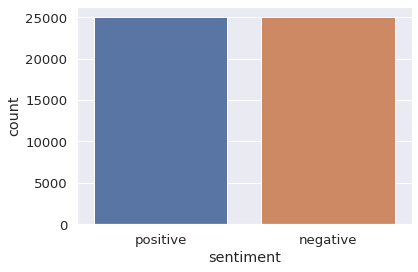

In [7]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df.sentiment)

In [8]:
stop = set(stopwords.words('english')) # removing words like he, she, the etc...
punctuation = list(punctuation)
stop.update(punctuation)

In [9]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Getting the corpus
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

#Bag of Words
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [10]:
df['review']=df['review'].apply(denoise_text)

In [11]:
df.sentiment.replace("positive" , 1 , inplace = True)
df.sentiment.replace("negative" , 0 , inplace = True)
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,1
1,wonderful little filming technique fashion giv...,1
2,thought wonderful way spend time hot summer si...,1
3,basically family little boy thinks zombie clos...,0
4,petter time visually stunning film mattei offe...,1


In [12]:
df['length_review'] = df['review'].apply(len)
df.head()

,review,sentiment,length_review
0,one reviewers mentioned watching oz episode ex...,1,808
1,wonderful little filming technique fashion giv...,1,474
2,thought wonderful way spend time hot summer si...,1,423
3,basically family little boy thinks zombie clos...,0,347
4,petter time visually stunning film mattei offe...,1,624


In [13]:
print("The max length of a review is {} words.".format(df['length_review'].max()))

The max length of a review is 7593 words.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


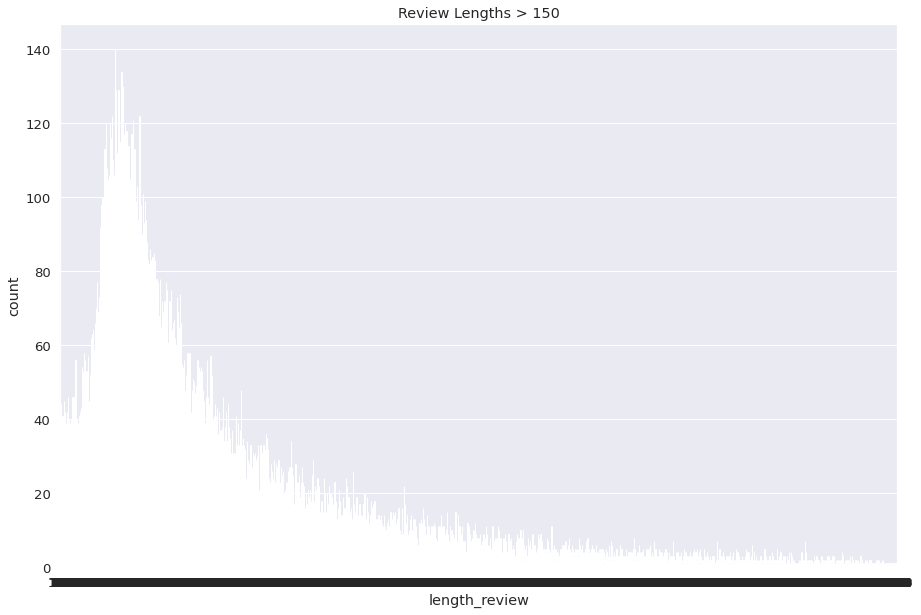

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
plt.title('Review Lengths > 150')
sns.countplot(df[df['length_review'] >150 ]['length_review'])

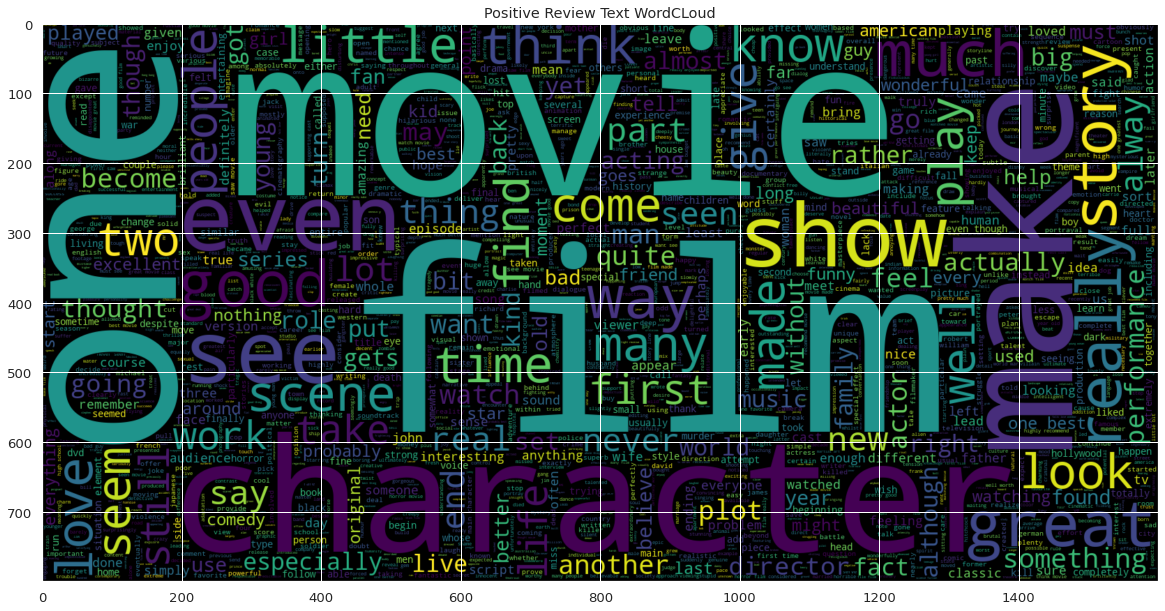

In [17]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].review))
plt.title('Positive Review Text WordCLoud')
plt.imshow(wc , interpolation = 'bilinear')

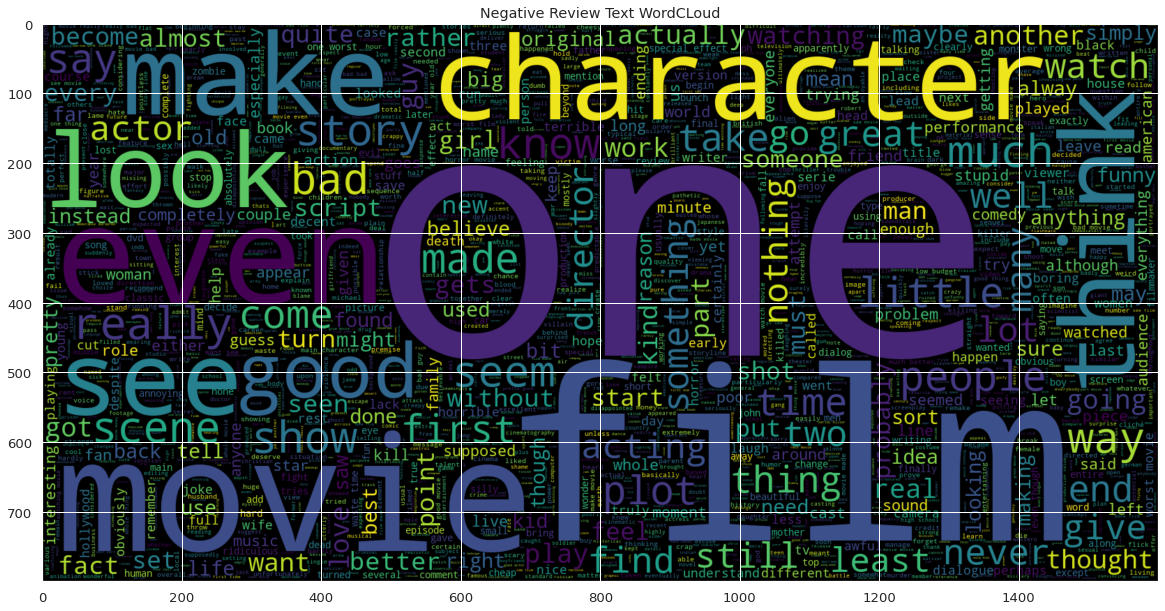

In [18]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].review))
plt.title('Negative Review Text WordCLoud')
plt.imshow(wc , interpolation = 'bilinear')

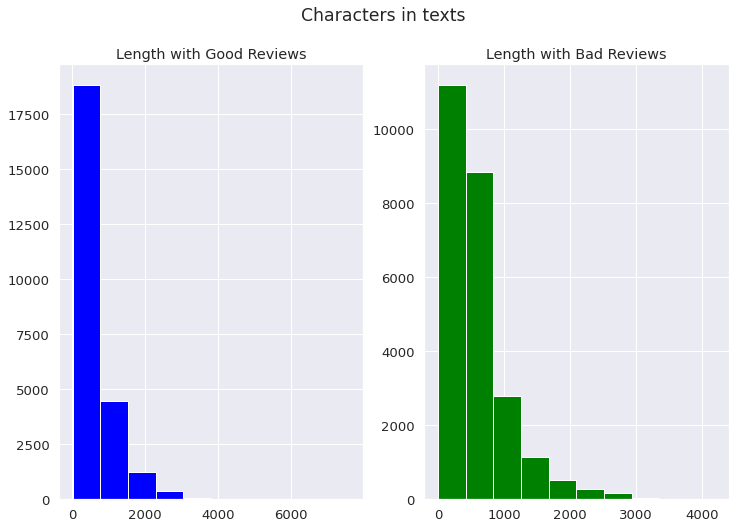

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['length_review']
ax1.hist(text_len,color='blue')
ax1.set_title('Length with Good Reviews')
text_len=df[df['sentiment']==0]['length_review']
ax2.hist(text_len,color='green')
ax2.set_title('Length with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each text')

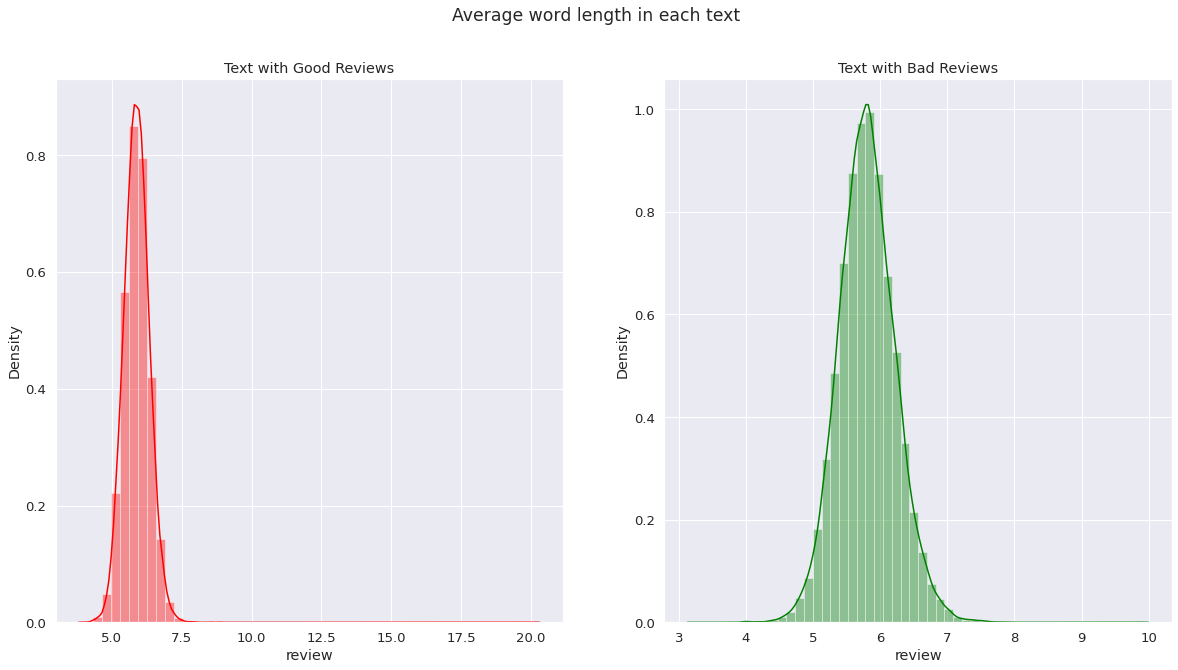

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['sentiment']==1]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Text with Good Reviews')
word=df[df['sentiment']==0]['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')

In [21]:
corpus = get_corpus(df.review)
corpus[:5]

['one', 'reviewers', 'mentioned', 'watching', 'oz']

In [22]:
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common = OrderedDict(most_common)
most_common

OrderedDict([('movie', 61496),
             ('film', 55088),
             ('one', 45067),
             ('like', 37303),
             ('would', 23815),
             ('even', 23720),
             ('good', 23475),
             ('really', 21806),
             ('see', 20906),
             ('get', 17692)])

Text(0.5, 1.0, 'Top 20 Commmon Words in Text')

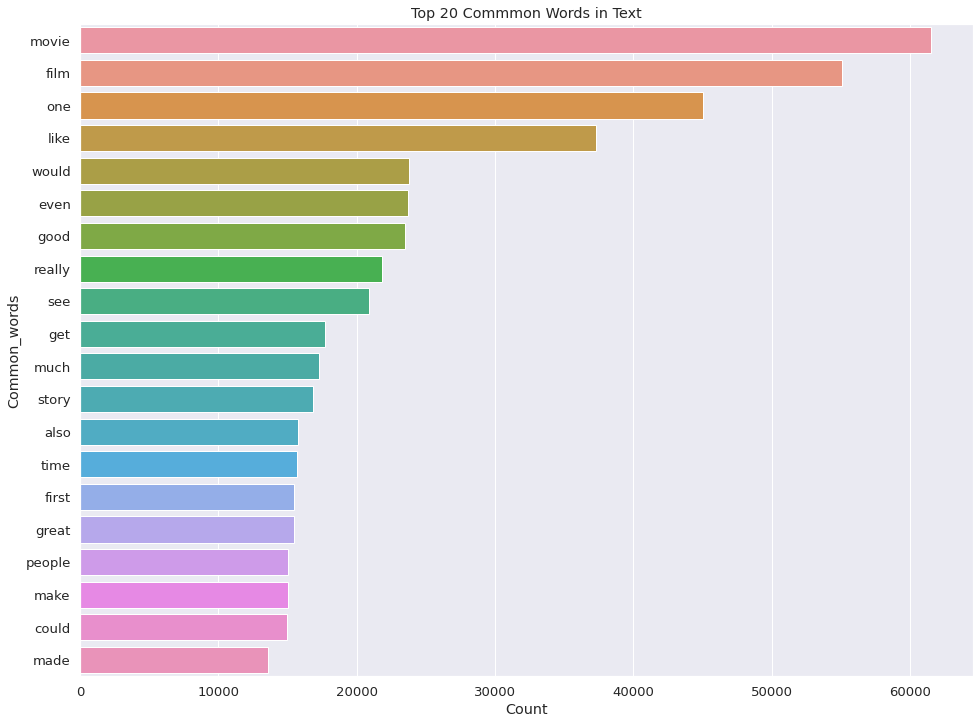

In [25]:
most_common_uni = get_top_text_ngrams(df.review,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
plt.figure(figsize=(16,12))
g = sns.barplot(data = temp, x="Count", y="Common_words")
g.set_title('Top 20 Commmon Words in Text')

Text(0.5, 1.0, 'Top 20 Commmon Bigrams in Text')

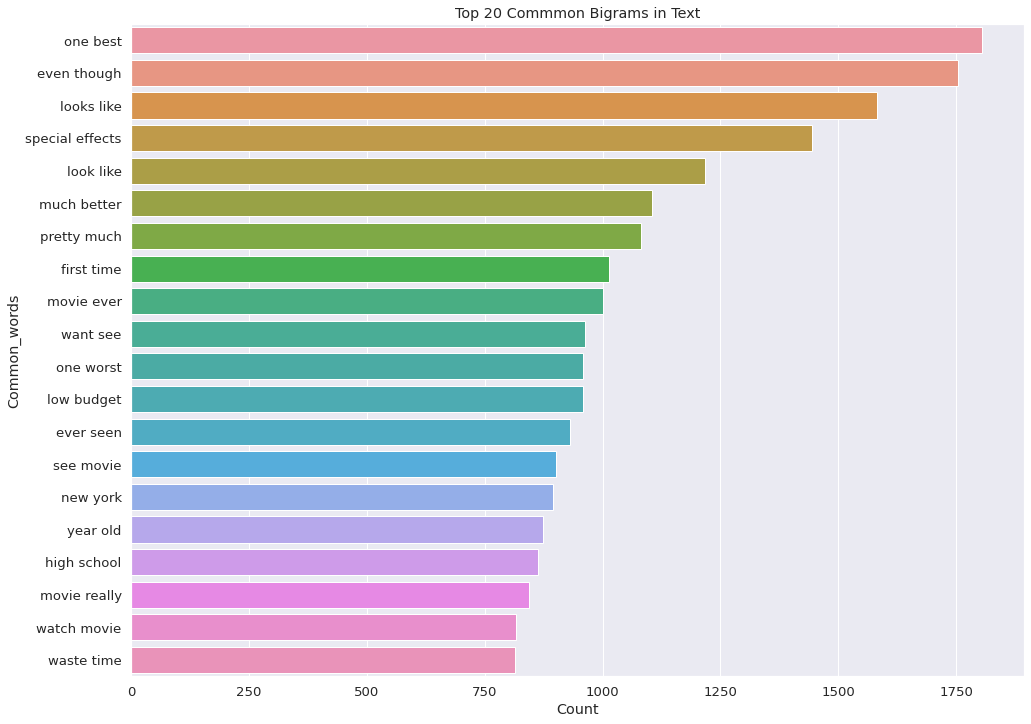

In [26]:
most_common_bi = get_top_text_ngrams(df.review,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
plt.figure(figsize=(16,12))
g = sns.barplot(data = temp, x="Count", y="Common_words")
g.set_title('Top 20 Commmon Bigrams in Text')

Text(0.5, 1.0, 'Top 20 Commmon Trigrams in Text')

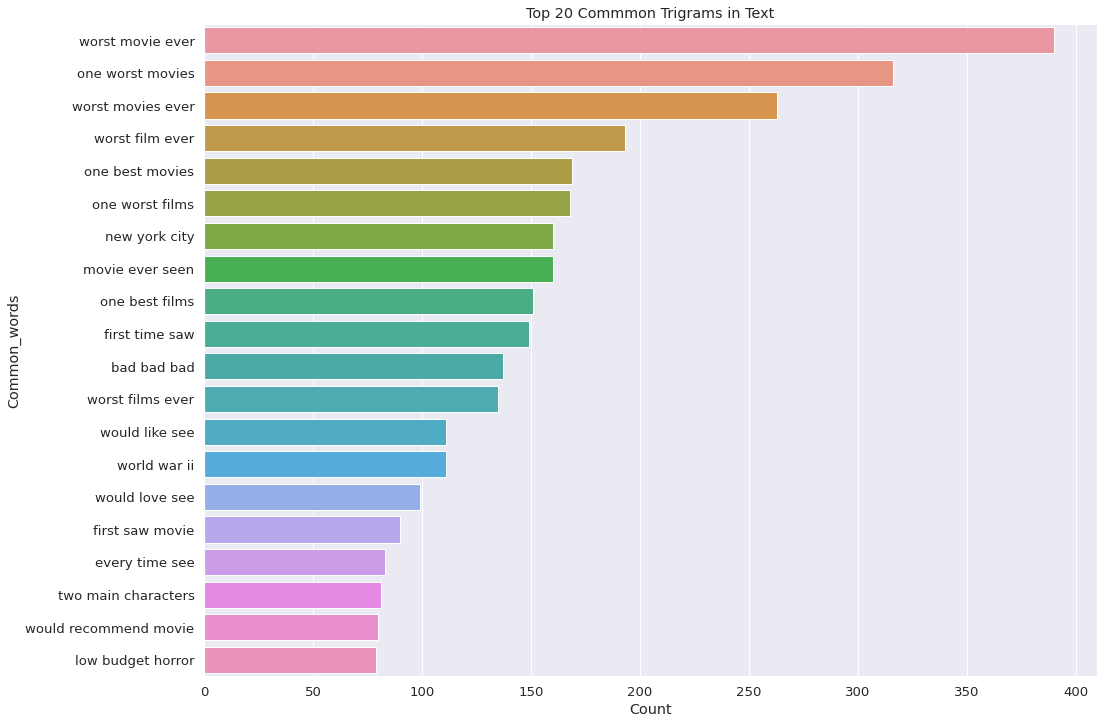

In [27]:
most_common_bi = get_top_text_ngrams(df.review,20,3)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
plt.figure(figsize=(16,12))
g = sns.barplot(data = temp, x="Count", y="Common_words")
g.set_title('Top 20 Commmon Trigrams in Text')